Abstract :- Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
Source:- https://archive.ics.uci.edu/ml/datasets/adult
Associated Task :- Classification, Prediction task is to determine whether a person makes over 50K a year.
This dataset has multivariate(categorical and interger) characteriistics. And also has missing values.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/adult.csv')

In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# data frame infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# checking missing values of data frame
df.isnull().sum().sort_index() / len(df)

age                0.0
capital-gain       0.0
capital-loss       0.0
education          0.0
educational-num    0.0
fnlwgt             0.0
gender             0.0
hours-per-week     0.0
income             0.0
marital-status     0.0
native-country     0.0
occupation         0.0
race               0.0
relationship       0.0
workclass          0.0
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

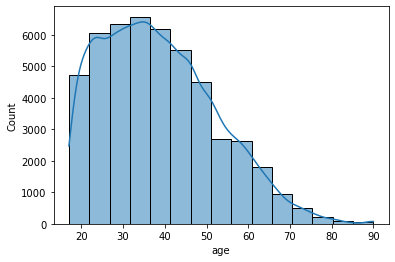

In [7]:
# Age, clearly skewed 
sns.histplot(df['age'] , bins = 15,kde = True) # skewed maybe needs to be normalized later

In [8]:
# Workclass variable is a categorical column so let's check the unique categories
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
# Interestingly there is category with '?' workclass, total rows 2799
df[df['workclass'] == '?'].count()

age                2799
workclass          2799
fnlwgt             2799
education          2799
educational-num    2799
marital-status     2799
occupation         2799
relationship       2799
race               2799
gender             2799
capital-gain       2799
capital-loss       2799
hours-per-week     2799
native-country     2799
income             2799
dtype: int64

In [10]:
# '?' can be renamed for 'other' as it's unknown or mistake
df['workclass'] = df['workclass'].replace({'?':'Other'})
df['workclass'].unique()

array(['Private', 'Local-gov', 'Other', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
# fnlwgt, final weight
# high numbers for STD lets use log on it 
df['fnlwgt'].describe() 

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [12]:
# After applying log
df['fnlwgt'] = df['fnlwgt'].apply(lambda x: np.log1p(x))
df['fnlwgt'].describe()

count    48842.000000
mean        11.982958
std          0.630817
min          9.416216
25%         11.674632
50%         12.090356
75%         12.378525
max         14.214556
Name: fnlwgt, dtype: float64

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

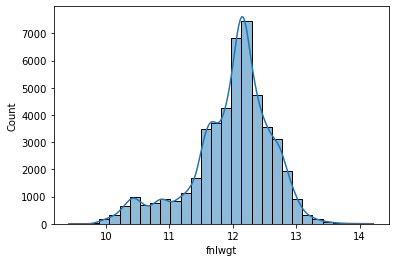

In [13]:
# fnlwgt, Final Weight
sns.histplot(df, x= 'fnlwgt'  , bins = 30 , kde = True)

In [14]:
# Education
print(df['education'].nunique())
print(df['education'].unique())


16
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


In [15]:
# Education value counts
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

<AxesSubplot:>

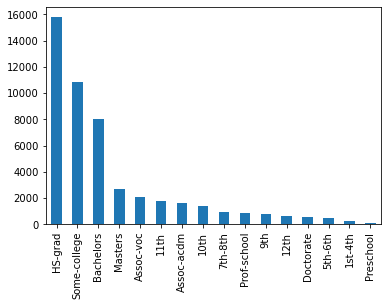

In [16]:
# visualizing 
df['education'].value_counts().plot(kind='bar')

In [17]:
# lets combine early education together as primary
def primary(x):
    if x in ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
             return 'Primary'
    else:
             return x


df['education'] = df['education'].apply(primary)

In [18]:
# Value counts again , more refined now
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Primary          6325
Masters          2657
Assoc-voc        2061
Assoc-acdm       1601
Prof-school       834
Doctorate         594
Preschool          83
Name: education, dtype: int64

<AxesSubplot:>

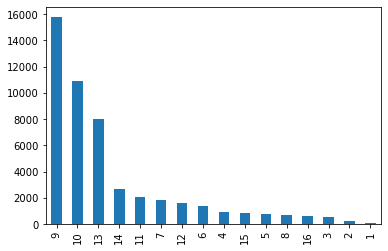

In [19]:
# education-num: continuous.
df['educational-num'].value_counts().plot(kind='bar')

In [20]:
# marital-status
df['marital-status'].value_counts() 

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [21]:
# Married Af spouse and married civ spouse same 
df['marital-status'].replace('Married-AF-spouse' , 'Married-civ-spouse' , inplace = True)
df['marital-status'].value_counts()

Married-civ-spouse       22416
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Name: marital-status, dtype: int64

In [22]:
# occupation ,
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [23]:
# needs to replace '?' occupation to other/unknown
df['occupation'] = df['occupation'].replace({'?':'Other'})
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Other',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

<AxesSubplot:>

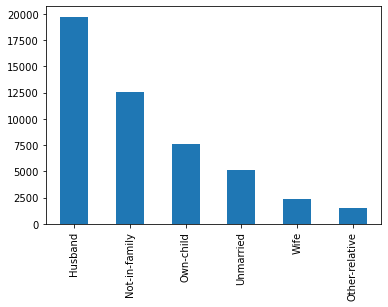

In [24]:
# relationship , 
df['relationship'].value_counts().plot(kind='bar')

<AxesSubplot:>

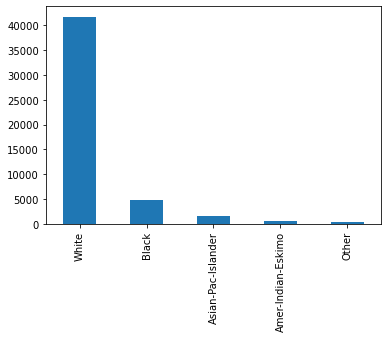

In [25]:
df['race'].value_counts().plot(kind='bar')

<AxesSubplot:>

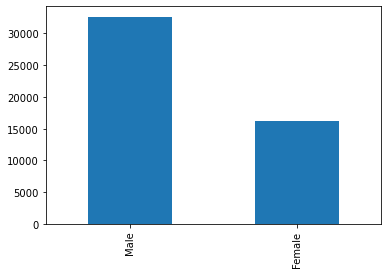

In [26]:
df['gender'].value_counts().plot(kind='bar')

In [27]:
# capital gain
# df['capital-gain'].nunique() # 123 different values and continous
df['capital-gain'].describe() # Outlier possible, std is huge

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [28]:
# capital loss
# df['capital-loss'].nunique() # 99 different values and continous
df['capital-loss'].describe() # Outlier possible, again std is way too big

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [29]:
#Hours per week
df['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [30]:
#Native Countries
# df['native-country'].nunique() 42 unique countries
df['native-country'].unique() # '?' needs to replace with Other/Unkwon

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [31]:
df['native-country'] = df['native-country'].replace({'?':'Other'})

In [32]:
# Income , Target Variable
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [33]:
df["income"] = df["income"].map({ "<=50K": 0, ">50K": 1 }) #or df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [34]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Primary'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, 'Prof-school'),
  Text(5, 0, 'Bachelors'),
  Text(6, 0, 'Masters'),
  Text(7, 0, 'Doctorate'),
  Text(8, 0, 'Assoc-voc'),
  Text(9, 0, 'Preschool')])

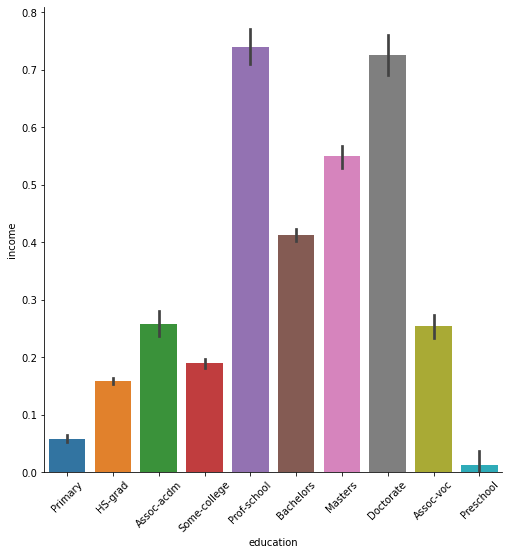

In [35]:
# Education and Income
sns.catplot(x = 'education' , y = 'income' , data = df , kind = 'bar' , height = 7)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Self-emp-not-inc'),
  Text(4, 0, 'Federal-gov'),
  Text(5, 0, 'State-gov'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

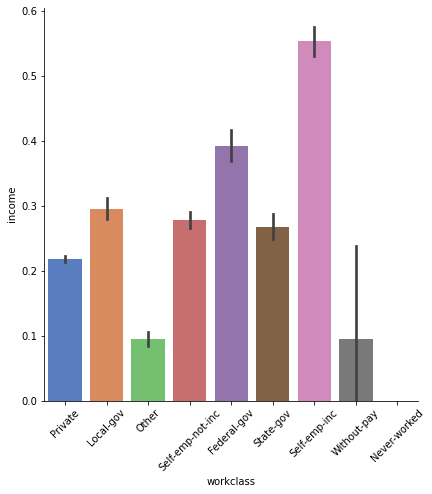

In [36]:
# Workclass and Income
sns.catplot(x = 'workclass' , y = 'income' ,data = df , kind = 'bar' , height= 6 , palette= 'muted')
plt.xticks(rotation = 45)

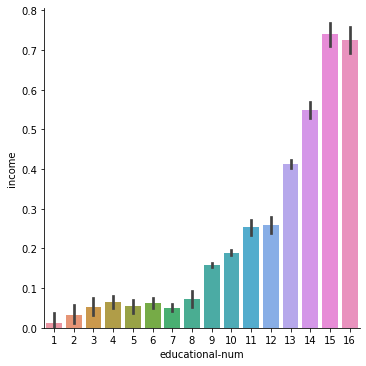

In [37]:
# education num
sns.catplot(x = 'educational-num' , y = 'income' , data = df , kind = 'bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent')])

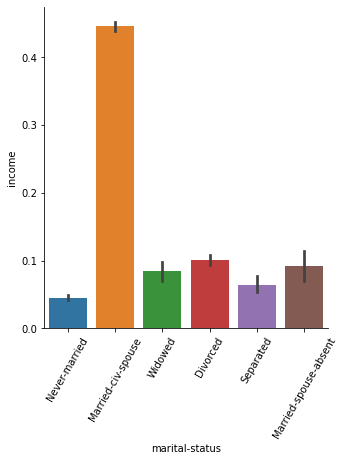

In [38]:
# Marital Status and Income
sns.catplot(x = 'marital-status' , y = 'income' , data = df , kind = 'bar')
plt.xticks(rotation = 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'Farming-fishing'),
  Text(2, 0, 'Protective-serv'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Prof-specialty'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Adm-clerical'),
  Text(8, 0, 'Exec-managerial'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Sales'),
  Text(11, 0, 'Priv-house-serv'),
  Text(12, 0, 'Transport-moving'),
  Text(13, 0, 'Handlers-cleaners'),
  Text(14, 0, 'Armed-Forces')])

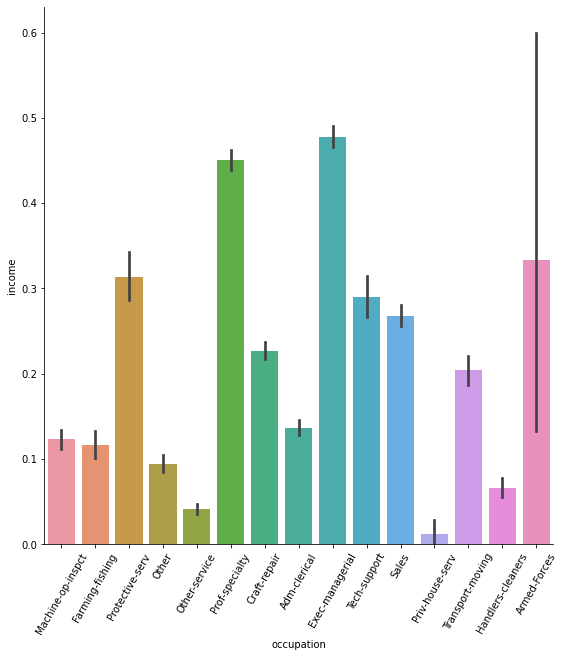

In [39]:
# occupation and Income
sns.catplot(x = 'occupation' , y = 'income' , data = df , kind = 'bar' , height = 8)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Own-child'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Not-in-family'),
  Text(3, 0, 'Unmarried'),
  Text(4, 0, 'Wife'),
  Text(5, 0, 'Other-relative')])

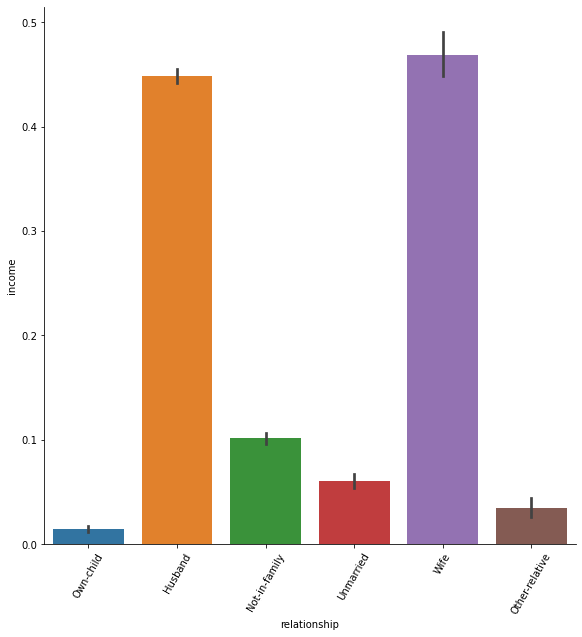

In [40]:
# relationship and Income
sns.catplot(x = 'relationship' , y = 'income' , data = df , kind = 'bar' , height = 8)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Amer-Indian-Eskimo')])

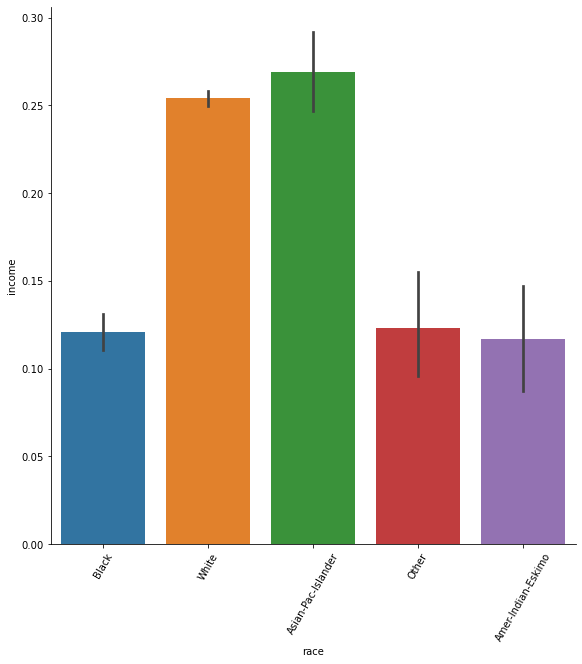

In [41]:
# Race and Income
sns.catplot(x = 'race' , y = 'income' , data = df , kind = 'bar' , height = 8)
plt.xticks(rotation = 60)

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

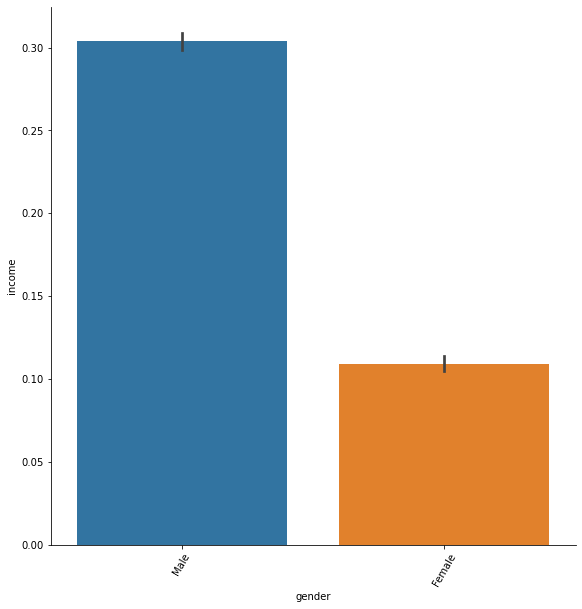

In [42]:
# Gender and Income
sns.catplot(x = 'gender' , y = 'income' , data = df , kind = 'bar' , height = 8)
plt.xticks(rotation = 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Peru'),
  Text(3, 0, 'Guatemala'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'Dominican-Republic'),
  Text(6, 0, 'Ireland'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'Thailand'),
  Text(10, 0, 'Haiti'),
  Text(11, 0, 'El-Salvador'),
  Text(12, 0, 'Puerto-Rico'),
  Text(13, 0, 'Vietnam'),
  Text(14, 0, 'South'),
  Text(15, 0, 'Columbia'),
  Text(16, 0, 'Japan'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Cambodia'),
  Text(19, 0, 'Poland'),
  Text(20, 0, 'Laos'),
  Text(21, 0, 'England'),
  Text(22, 0, 'Cuba'),
  Text(23, 0, 'Taiwan'),
  Text(24, 0, 'Italy'),
  Text(25, 0, 'Canada'),
  Text(26, 0, 'Portugal'),
  Text(27, 0, 'China'),
  Text(28, 0, 'Nicaragua'),
  Text(29, 0, 'Honduras'),
  Text(30, 0, 'Iran'),
  

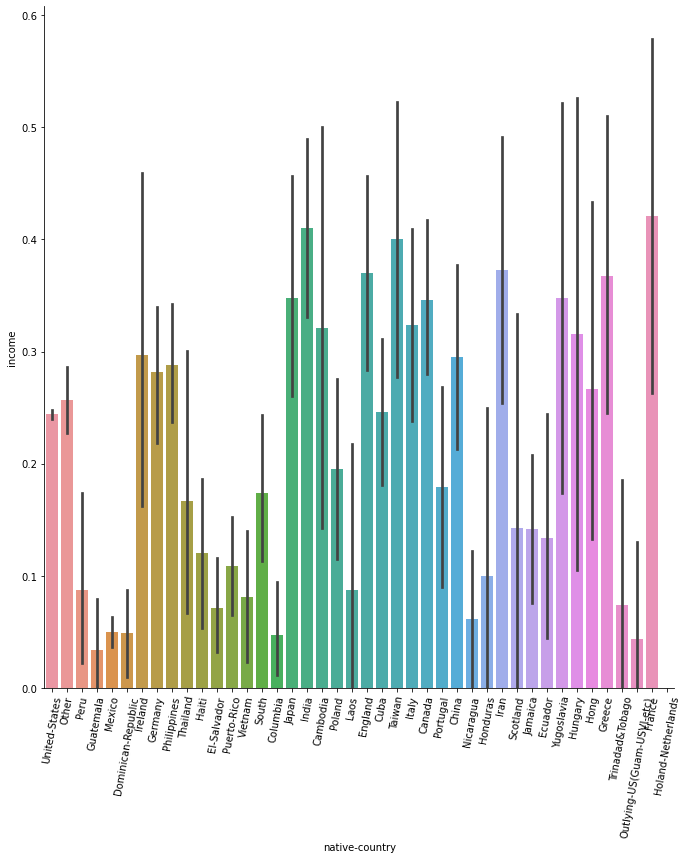

In [43]:
# native country
sns.catplot(x = 'native-country' , y = 'income' , data = df , kind = 'bar', height = 10)
plt.xticks(rotation = 80)

In [44]:
# object(categorical columns)
categorical_features = df.select_dtypes(include =['object']).axes[1]

In [45]:
# one hot encoding and also concating the rest of columns.
# dropping the first columns which is usually considered for better results

for col in categorical_features:
    df = pd.concat([df , pd.get_dummies(df[col], prefix = col , prefix_sep = ':', drop_first = True)] , axis = 1)
    df.drop(col , axis = 1 , inplace = True)

In [46]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass:Local-gov,workclass:Never-worked,workclass:Other,...,native-country:Portugal,native-country:Puerto-Rico,native-country:Scotland,native-country:South,native-country:Taiwan,native-country:Thailand,native-country:Trinadad&Tobago,native-country:United-States,native-country:Vietnam,native-country:Yugoslavia
0,25,12.331837,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,11.405507,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12.727696,12,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,11.984952,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,11.547308,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 94 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48842 non-null  int64  
 1   fnlwgt                                     48842 non-null  float64
 2   educational-num                            48842 non-null  int64  
 3   capital-gain                               48842 non-null  int64  
 4   capital-loss                               48842 non-null  int64  
 5   hours-per-week                             48842 non-null  int64  
 6   income                                     48842 non-null  int64  
 7   workclass:Local-gov                        48842 non-null  uint8  
 8   workclass:Never-worked                     48842 non-null  uint8  
 9   workclass:Other                            48842 non-null  uint8  
 10  workclass:Private     

In [48]:
X = df.drop('income' , axis = 1).copy()
y = df['income']

In [49]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass:Local-gov,workclass:Never-worked,workclass:Other,workclass:Private,...,native-country:Portugal,native-country:Puerto-Rico,native-country:Scotland,native-country:South,native-country:Taiwan,native-country:Thailand,native-country:Trinadad&Tobago,native-country:United-States,native-country:Vietnam,native-country:Yugoslavia
0,25,12.331837,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,11.405507,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12.727696,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,11.984952,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,11.547308,10,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
y.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , plot_confusion_matrix

In [52]:
classifier = RandomForestClassifier()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [54]:
classifier.fit(X_train , y_train)

RandomForestClassifier()

In [55]:
preds = classifier.predict(X_test)

In [56]:
accuracy_score(y_test , preds)

0.8534927524363279

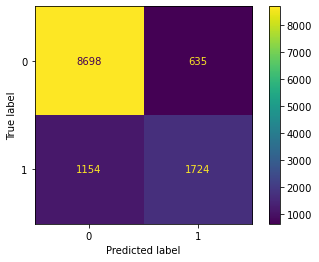

In [57]:
plot_confusion_matrix(classifier,X_test ,y_test)